## PROBLEM STATEMENT

- Providing an implementation of logistic regression (binary classification algorithm) with a given scenario:

### SCENARIO:
Suppose that selection for a field trip that a school is organizing is based on each applicant's last two exam results. We are the selection committee, and we want to determine each applicant’s chance of being selected based on their results on two exams. 
* Let's say we have historical data from previous applicants that is used as a training set for logistic regression. 
* For each training example, we have the applicant’s scores on two exams (two features) and the admissions decision (associated output label).


#### Let's build a classification model that estimates an applicant’s probability of selection for the field-trip based on the scores from those two exams. 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math
from utils import *

In [24]:
# load dataset function is defined in utils.py
# load the training data. 
# X_train is a 2D array, y_train is a 1D array.
X_train, y_train = load_data("data/data.txt")

### VISUALIZE THE INITIAL TRAINING SET:

- I'll plot the given training data on a set of axes (where the axes are the two features-->(two exam marks)) to provide visualization of what we're dealing with.
    - We'll denote the ``positive class`` as being selected for the field trip.
    - We'll denote the ``negative class`` as not being selected for the field trip.




The function to generate this plot is written in the ``utils.py`` file for organization purposes, we'll simply call it here :)

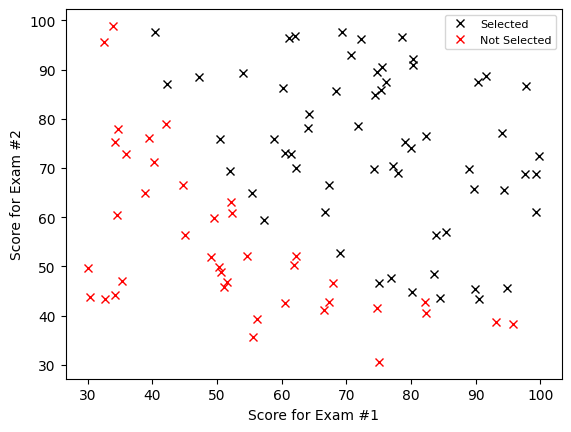

In [25]:
plot_data(X_train, y_train, positive_class_label="Selected", negative_class_label="Not Selected")

plt.xlabel("Score for Exam #1")
plt.ylabel("Score for Exam #2")
plt.legend(prop={'size': 8}, loc="upper right")
plt.show()

### SIGMOID FUNCTION -- ITS IMPORTANCE:

- For Logistic Regression, our given model is represented as a the function:
$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
- where the function $g$ is the sigmoid function defined as:

$$g(z) = \frac{1}{1+e^{-z}} \,\,\,\, equivalent\,\, to: \,\,\, g(z) = \frac{1}{1+e^{-\mathbf{w}\cdot \mathbf{x} + b}} $$ 

- This function allows us to predict the probability of a binary variable. The unique characteristic of the sigmoid function is that its range is: $[0,1]$, which is perfect for our purposes, as the probability of an event is always between 0 and 1.

``IMPORTANT NOTES``: 

- The sigmoid function is also differentiable, which is important for our optimization algorithm (gradient descent) to work.
- The parameter $z$ can be an array of numbers, in which case, we'd apply the sigmoid function to each element of the array.
- For more information on the variables ``w`` and ``b``, please refer to external information regarding the weights and bias of a logistic regression model.


In [26]:
# defining the sigmoid function
def sigmoid(z):

    # compute the sigmoid of z.
    g = 1 / (1 + np.exp(-z))

    return g

### COST FUNCTION -- ITS IMPORTANCE:

#### Quick Overview of the Cost Function:
- The cost function is used to measure the performance of our model. It is a function that takes in the predicted output and the actual output and returns a single number that represents the error of the model.
- Our goal is to minimize the cost to get the most accurate predictions, which is why we use the cost function to optimize our model.

#### Cost Function for Logistic Regression:
For logistic regression, the cost function is

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where,
* m is the number of training examples in the dataset.
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, equivalent to $g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$, where $g$ is the sigmoid function.
* $y^{(i)}$ is the actual label for the $i^{th}$ data point.

Let's test the cost function upon implementation with some random values for the weights and bias, so that we can get an idea of how it works!
    

In [27]:
# defining the cost function.
def compute_logistic_cost(X, y, w, b):

    # creating a variable to store the 'm' training examples, and cost.
    m = X.shape[0]
    cost = 0

    # compute the cost.
    for i in range(m):

        # compute the sigmoid of the dot product of the weights and the training example, plus the bias.
        z_i = np.dot(w, X[i]) + b
        f_wb_i = sigmoid(z_i)

        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)
    
    cost /= m
    return cost

m, n = X_train.shape
# compute and display the cost with 'w' & 'b' initialized to zeroes for simplicity.
w_init = np.zeros(n)
b_init = 0.
cost = compute_logistic_cost(X_train, y_train, w_init, b_init)
print('The computed cost at the sample values of w and b is: {:.5f}'.format(cost))

The computed cost at the sample values of w and b is: 0.69315
